In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# **Part 1 - Data Preprocessing**

**1.1 Importing the Dataset**

In [2]:
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
df = pd.read_csv('breast_cancer_data.csv', index_col=0)
df  #diagnosis is M for malignant and B for benign

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


**1.2 Data Cleanup**

In [3]:
df.isnull().sum() #looks like the last column is all null, so lets drop it

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [4]:
df = df.drop(columns=['Unnamed: 32'])
df.head() #removed the last column

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**1.3 Separating Inputs and Label**

In [5]:
X = df.iloc[:, 1:].values #take all rows and index columns from 1 to 31
y = df.iloc[:, 0].values #take all rows of column 0 which is the label

print(X)
print(y[0:10])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']


**1.4 Encoding the Diagnosis Column**

In [6]:
y[y == 'M'] = 1 #replacing Malignant labels with 1
y[y == 'B'] = 0 #replacing Benign labels with 0

y.dtype #notice datatype is O = object

dtype('O')

In [7]:
y = y.astype(str).astype(int) #converting datatype to int instead
y.dtype

dtype('int64')

**1.5 Train Test Split**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train

array([[1.057e+01, 1.832e+01, 6.682e+01, ..., 2.222e-02, 2.699e-01,
        6.736e-02],
       [1.231e+01, 1.652e+01, 7.919e+01, ..., 8.660e-02, 2.618e-01,
        7.609e-02],
       [8.878e+00, 1.549e+01, 5.674e+01, ..., 4.762e-02, 2.434e-01,
        7.431e-02],
       ...,
       [9.731e+00, 1.534e+01, 6.378e+01, ..., 1.571e-01, 3.108e-01,
        1.259e-01],
       [1.497e+01, 1.695e+01, 9.622e+01, ..., 8.485e-02, 2.404e-01,
        6.428e-02],
       [1.210e+01, 1.772e+01, 7.807e+01, ..., 6.266e-02, 3.049e-01,
        7.081e-02]])

**1.6 Feature Scaling**

In [9]:
#so here we're just scaling all our values using the following formula: z = (x - u) / s
#x is the input, u is the mean, s is the standard deviation
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#we do this because models normally perform better when numerical input variables are scaled to a standard range
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_test

array([[ 1.58258225,  0.15335662,  1.58333719, ...,  2.03923547,
        -0.2700905 ,  2.39826138],
       [-0.09662035, -0.81369891, -0.14922077, ..., -1.27612938,
        -1.61467441, -0.8863913 ],
       [-0.34215082, -0.68411827, -0.38825074, ..., -0.52598961,
         0.14537082, -0.81227332],
       ...,
       [-0.19539698,  0.10776343, -0.25277314, ..., -0.01324934,
        -0.06613676, -0.58725329],
       [-0.07404284, -0.54013978, -0.04321262, ...,  0.73948079,
         1.06089649,  1.12919103],
       [-0.38166147,  0.78926162, -0.42140387, ..., -0.35898714,
        -0.14922903, -0.21613019]])

# **Part 2 - Training and Evaluating the Model**

**2.1 Logistic Regression Model**

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
pred_log = logreg.predict(X_test)
pred_log

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [12]:
print(classification_report(y_test,pred_log)) #very good results

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.99      0.97      0.98        68

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [13]:
print(confusion_matrix(y_test,pred_log)) #misclassified 2 malignant cells as benign, which is very bad false negative since the individual will think they're cancer free
#however we are accurate 98% of the time which is great

[[119   1]
 [  2  66]]


**2.2 K-Nearest Neighbour Model**

Text(0.5, 1.0, 'Error Rate vs. K Value')

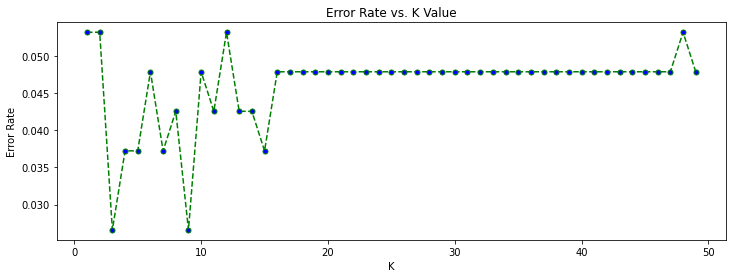

In [14]:
error = []

#Choosing the Optimal K value
for i in range(1,50):
    knearest = KNeighborsClassifier(n_neighbors=i)
    knearest.fit(X_train,y_train)
    pred_i = knearest.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,4))
plt.plot(range(1,50),error,color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.ylabel('Error Rate')
plt.xlabel('K')
plt.title('Error Rate vs. K Value')
#looks like the lowest error is when k = 3

In [15]:
# NOW WITH K=23
knearest = KNeighborsClassifier(n_neighbors=3)

knearest.fit(X_train,y_train)
pred_k = knearest.predict(X_test)

print(classification_report(y_test,pred_k)) #performed extremely well, very close logistic regression model

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       120
           1       1.00      0.93      0.96        68

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



In [16]:
print(confusion_matrix(y_test,pred_k)) #very few misclassifications, but still misclassified 5 malignant as benign which is dangerous

[[120   0]
 [  5  63]]
